<a href="https://colab.research.google.com/github/YASHASHRIH2002/Exploratory-data-cleaning-Zomato-Dataset-/blob/main/EDA_Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving zomato.csv to zomato.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
df=pd.read_csv(io.StringIO(uploaded['zomato.csv'].decode('latin1')))

Making a copy of the original dataset

In [ ]:
zomato_data = df.copy()
print(zomato_data.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


Handling missing values

In [ ]:
print("Missing values before handling:\n", zomato_data.isnull().sum())
# numeric_cols = zomato_data.select_dtypes(include=['int64', 'float64']).columns
# for col in numeric_cols:
#     zomato_data[col] = zomato_data[col].fillna(zomato_data[col].median())
# categorical_cols = zomato_data.select_dtypes(include=['object']).columns
# for col in categorical_cols:
#     mode_value = zomato_data[col].mode()[0] if not zomato_data[col].mode().empty else 'unknown'
#     zomato_data[col] = zomato_data[col].fillna(mode_value)

Missing values before handling:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


replacing the missing values by 'unknown'

In [ ]:
zomato_data=zomato_data.fillna('unknown')

Remove duplicates

In [ ]:
initial_rows = zomato_data.shape[0]
zomato_data = zomato_data.drop_duplicates()
final_rows = zomato_data.shape[0]
print(f"\nDuplicates removed: {initial_rows - final_rows} (Initial: {initial_rows}, Final: {final_rows})")


Duplicates removed: 0 (Initial: 9551, Final: 9551)


Standardize text columns

In [ ]:
text_cols = ['Restaurant Name', 'City','Locality','Address', 'Cuisines']
for col in text_cols:
  zomato_data[col]=zomato_data[col].astype(str).str.title().str.strip()
  if col=='Cuisines':
    zomato_data[col]=zomato_data[col].str.lower().str.strip()
print("\nSample standardized text (first 5 rows):\n", zomato_data[text_cols].head(2))


Sample standardized text (first 5 rows):
     Restaurant Name         City                                    Locality  \
0  Le Petit Souffle  Makati City   Century City Mall, Poblacion, Makati City   
1  Izakaya Kikufuji  Makati City  Little Tokyo, Legaspi Village, Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                     Cuisines  
0  french, japanese, desserts  
1                    japanese  


Correcting the data types

In [ ]:
numeric_cols_to_convert = ['Votes', 'Average Cost for Two', 'Price range']  # Adjust based on dataset
for col in numeric_cols_to_convert:
    if col in zomato_data.columns:
        zomato_data[col] = pd.to_numeric(zomato_data[col], errors='coerce')
        if zomato_data[col].notna().all() and (zomato_data[col] % 1 == 0).all():
            zomato_data[col] = zomato_data[col].astype('int64')
        else:
            zomato_data[col] = zomato_data[col].astype('float64')
print("\nUpdated data types:\n", zomato_data.dtypes)


Updated data types:
 Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


Handling outliers using IQR method

In [ ]:
numeric_cols_for_outliers = zomato_data.select_dtypes(include=['int64', 'float64']).columns
Q1 = zomato_data[numeric_cols_for_outliers].quantile(0.25)
Q3 = zomato_data[numeric_cols_for_outliers].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for col in numeric_cols_for_outliers:
    zomato_data[col] = np.where(zomato_data[col] > upper_bound[col], upper_bound[col],
                               np.where(zomato_data[col] < lower_bound[col], lower_bound[col],
                                        zomato_data[col]))
print("\nOutliers handled (first 5 rows of numeric columns):\n", zomato_data[numeric_cols_for_outliers].head())


Outliers handled (first 5 rows of numeric columns):
    Restaurant ID  Country Code  Longitude   Latitude  Average Cost for two  \
0      6317637.0           1.0  77.583001  28.232644                1100.0   
1      6304287.0           1.0  77.583001  28.232644                1200.0   
2      6300002.0           1.0  77.583001  28.232644                1375.0   
3      6318506.0           1.0  77.583001  28.232644                1375.0   
4      6314302.0           1.0  77.583001  28.232644                1375.0   

   Price range  Aggregate rating  Votes  
0          3.0               4.8  314.0  
1          3.0               4.5  320.0  
2          3.5               4.4  270.0  
3          3.5               4.9  320.0  
4          3.5               4.8  229.0  


In [ ]:
df = df[(df['Latitude'].between(-90, 90)) & (df['Longitude'].between(-180, 180))]

Exploraatory data analysis (EDA)
focusing on:
1. Top locations, cuisines and restaurant types.
2. How do ratings correlate with cost, online ordering or votes?
3. Treands in meal types or booking preferences.

In [ ]:
#style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#getting values for the basic stats
print("\nRating Summary\n")
print(zomato_data['Aggregate rating'].describe().to_string(index=True,name=False))

print ("\nCost summary\n")
print(zomato_data['Average Cost for two'].describe().to_string(index=True,name=False))

top_cities=zomato_data['City'].value_counts().head(10)
top_cities.index.name=None
print("\nTop 10 Cities\n")
print(top_cities.to_string(index=True,name=False))

top_cuisines=zomato_data['Cuisines'].str.split(',',expand=True).stack().str.strip()
cuisine_counts=top_cuisines.value_counts().head(10)
print("\nTop 10 Cuisines:\n")
print(cuisine_counts.to_string(index=True,name=False))

print("\nAverage Rating by Online Delivery:")
print(df.groupby('Has Online delivery')['Aggregate rating'].mean().to_string(index=True,name=False))
print("\nAverage Rating by Table Booking:")
print(df.groupby('Has Table booking')['Aggregate rating'].mean().to_string(index=True,name=False))


Rating Summary

count    9551.000000
mean        2.823799
std         1.243066
min         0.700000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000

Cost summary

count    9551.000000
mean      521.551356
std       379.320671
min         0.000000
25%       250.000000
50%       400.000000
75%       700.000000
max      1375.000000

Top 10 Cities

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21

Top 10 Cuisines:

north indian    3960
chinese         2735
fast food       1986
mughlai          995
italian          764
bakery           745
continental      736
cafe             703
desserts         653
south indian     636

Average Rating by Online Delivery:
Has Online delivery
No     2.465296
Yes    3.248837

Average Rating by Table Booking:
Has Table booking
No     2.559359
Yes    3.441969


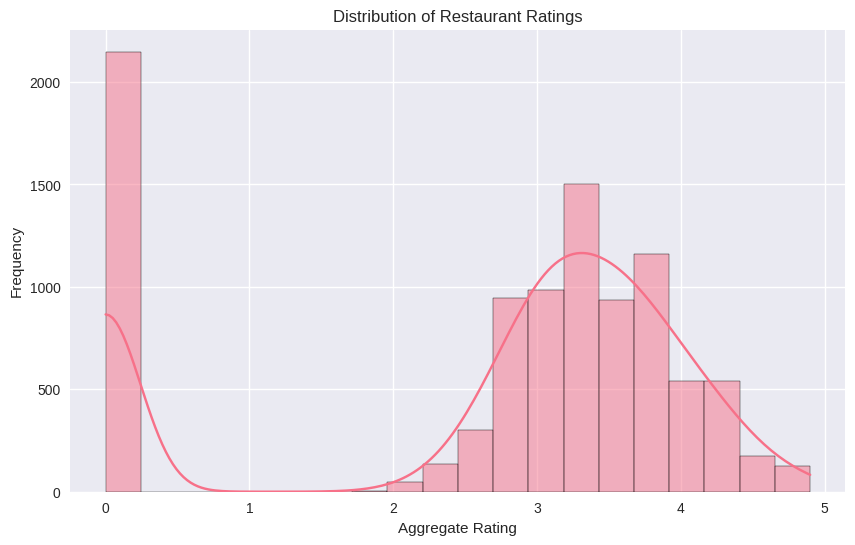

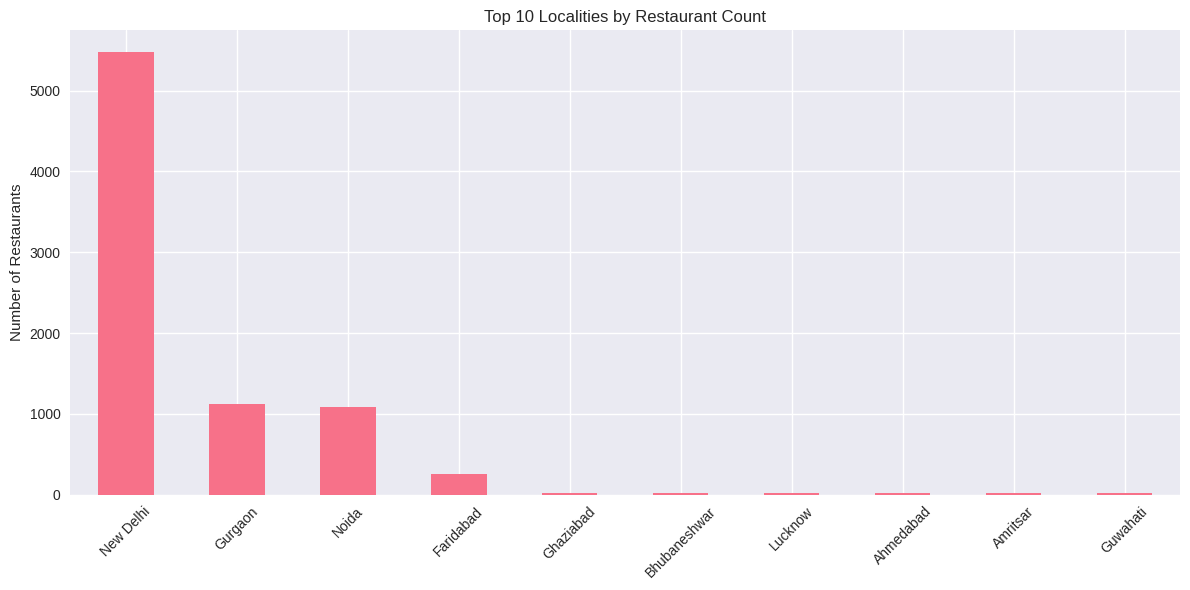

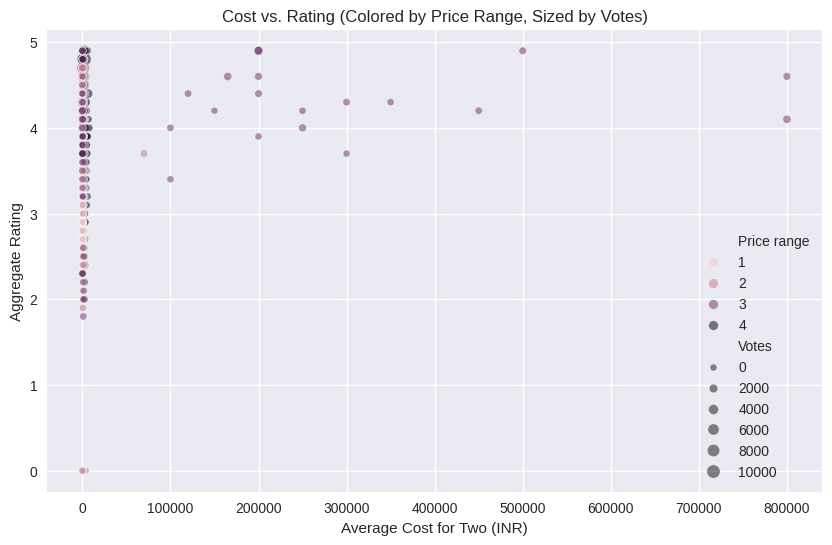

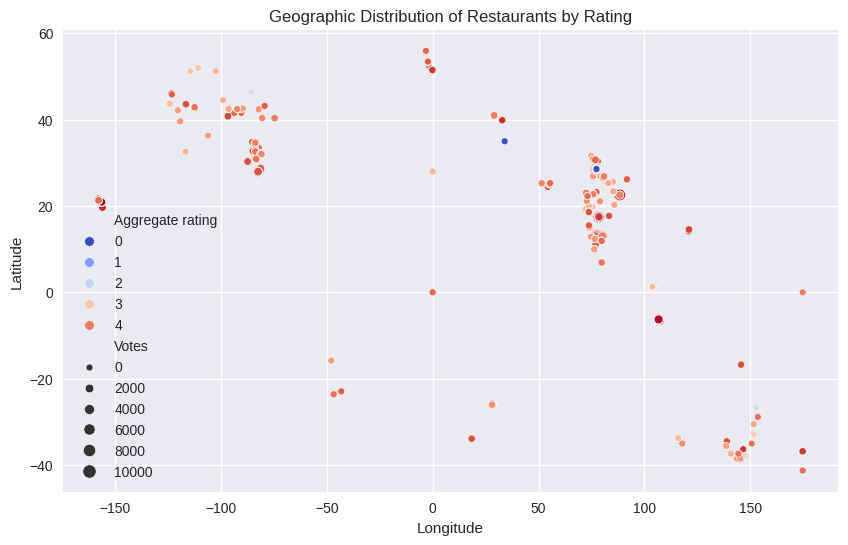

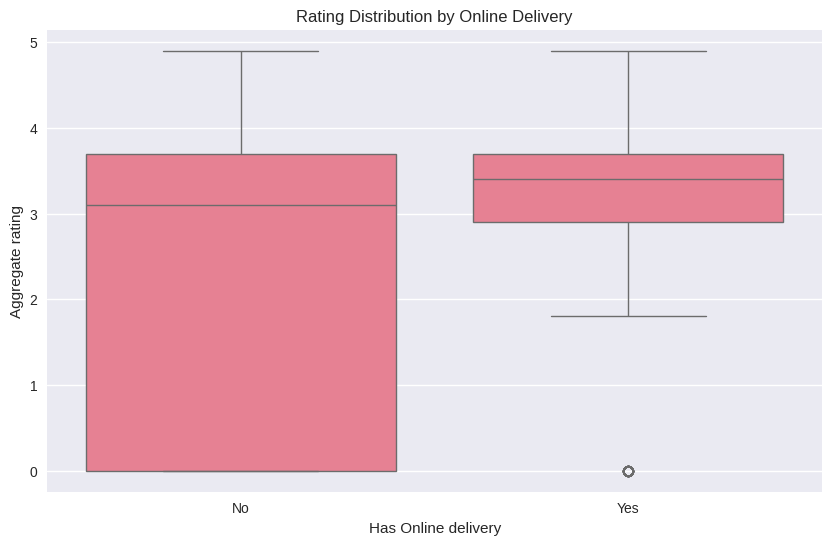

In [ ]:
#Histogram: Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.savefig('rating_hist.png')
plt.show()

#Bar Chart: Top Localities
plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar')
plt.title('Top 10 Localities by Restaurant Count')
plt.xticks(rotation=45)
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.savefig('top_localities_bar.png')
plt.show()

#Scatter Plot: Cost vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average Cost for two', y='Aggregate rating', hue='Price range', size='Votes', alpha=0.6)
plt.title('Cost vs. Rating (Colored by Price Range, Sized by Votes)')
plt.xlabel('Average Cost for Two (INR)')
plt.ylabel('Aggregate Rating')
plt.savefig('cost_vs_rating_scatter.png')
plt.show()

#High-rated restaurants may cluster in urban centers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Aggregate rating', palette='coolwarm', size='Votes')
plt.title('Geographic Distribution of Restaurants by Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Geo_distribution_rating.png')
plt.show()

#Online delivery restaurants tend to have slightly higher ratings
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Has Online delivery', y='Aggregate rating')
plt.title('Rating Distribution by Online Delivery')
plt.savefig('Rating_distribution_on_delivery.png')
plt.show()

Downloading the graphs

In [ ]:
print("Visualizations saved as 'ratings_hist.png', 'top_localities_bar.png', and 'cost_vs_rating_scatter.png'")

Visualizations saved as 'ratings_hist.png', 'top_localities_bar.png', and 'cost_vs_rating_scatter.png'
